### Comments
***The problem can be solved using bit operations with a bit mask***

* Idea here is to extract the last bit of each number and compare the following cases:

```
# Input: a = 2, b = 6, c = 5
# a --> 010
# b --> 110
# c --> 101
```

* c is 1 and both a and b are 0 == 1 operation on either a or b

```
# a --> 010 --> (optional) 011
# b --> 110 --> (optional) 111
# c --> 101
```

* c is 0 and either a or b or both are 1

```
# a --> 01 --> 
# b --> 11 --> 
# c --> 10
```

* In this case the number of opeartions are equal to: (a&1) + (b&1). 
* As we dont know if we need to flip just one bit or both since or result will be effected by it.



### Complexity:

***Time***: O(log(n))

* With n being the largest of the three inputs 

***Space***: O(1)

In [ ]:
class Solution:
    def minFlips(self, a: int, b: int, c: int) -> int:
        count = 0
        bitMask = 1
        while c > 0 or a > 0 or b > 0:
            aActual = a & bitMask
            bActual = b & bitMask
            orResult = aActual | bActual

            cExpected = c & bitMask
            if orResult != cExpected:
                if orResult and not cExpected:
                    count += aActual + bActual
                else:
                    count += 1
            c >>= 1
            a >>= 1
            b >>= 1
        return count
    
s = Solution()


# Example 1:


# Input: a = 2, b = 6, c = 5
# a --> 010
# b --> 110
# c --> 101
# Output: 3
# Explanation: After flips a = 1 , b = 4 , c = 5 such that (a OR b == c)

# print(s.minFlips(2, 6, 5))
# Example 2:

# Input: a = 4, b = 2, c = 7
# Output: 1

# print(s.minFlips(4, 2, 7))
# Example 3:

# Input: a = 1, b = 2, c = 3
# Output: 0
# print(s.minFlips(1, 2, 3))

# a --> 0101
# b --> 0010
# b --> 1000
# 4
# print(s.minFlips(5, 2, 8))


# a --> 1000
# b --> 0011
# c --> 0101
# 3
print(s.minFlips(8, 3, 5))

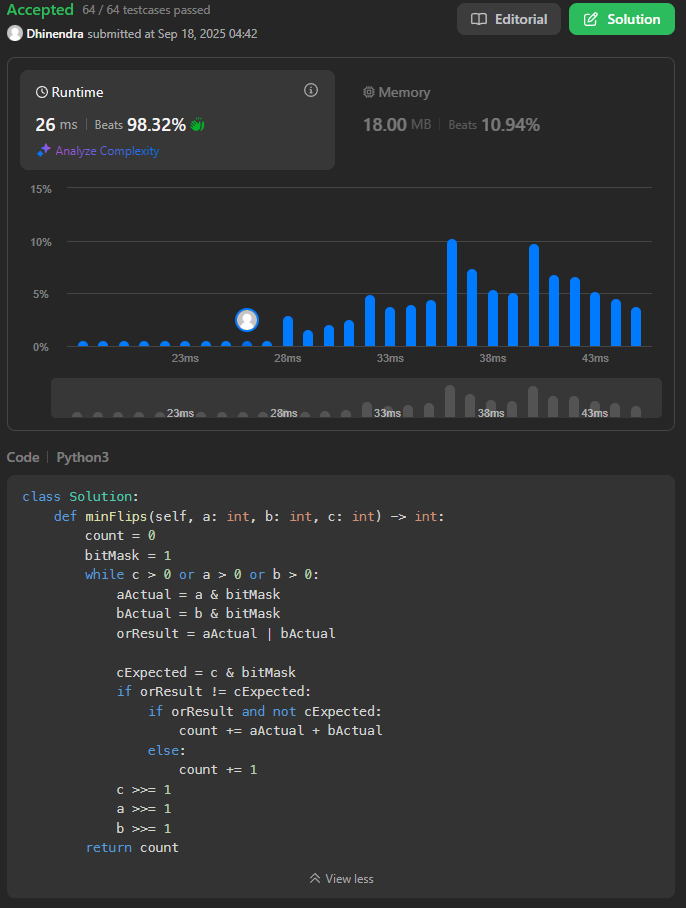

### Community References:


* Better approach with the same priciple is:

```
class Solution:
    def minFlips(self, a: int, b: int, c: int) -> int:
        answer = 0
        while a or b or c:
            # This way we just check if the expected result is 1 or 0.
            if c & 1:
                # Then if either a or b is 1 we add 0 and else we flip one bit
                answer += 0 if ((a & 1) or (b & 1)) else 1
            else:
                # Same as ours when 0 we have to check if we need to flip 1 or 2 bits since or will be effected by both.
                answer += (a & 1) + (b & 1)
            a >>= 1
            b >>= 1
            c >>= 1
        return answer
```

